In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pk
#import networkx as nx
import re 

path = "c:/Facultad/Tesis/"
base = pd.read_csv(path+'Corpus_medios_nac.csv')

C:\Users\Asus\AppData\Local\Temp\ipykernel_9880\1846437740.py:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv(path+'Corpus_medios_nac.csv')


In [2]:
def replace(x):
    x = str(x)
    x = x.replace('”', '"')
    x = x.replace('“', '"')
    x = x.replace('”', '"')
    x = x.replace('\x93', '"')
    x = x.replace('\x94', '"')
    
    return x

def extract_quotes(x):
    return re.findall('"([^"]*)"', x)

def words_length(x):
    return len(x.split(" "))

def pre_process_quoted(df):
    df['nota'] = df['nota'].apply(replace)
    df['citas']  = df['nota'].apply(extract_quotes)
    df_quoutes2 = pd.DataFrame({'Fecha': df['fecha'].iloc[1:], 'Hora': df['hora'].iloc[1:], 'Cita': df['citas'].iloc[1:], 'Link': df['link'].iloc[1:], 'Nota': df['nota'].iloc[1:]})
    df_quoutes = df_quoutes2.explode('Cita') # Cada cita sea una fila distinta
    df_quoutes = df_quoutes.dropna(subset=['Cita']) # Elimino la filas que no haya quotes

    #df_quoutes['Citas'] = df_quoutes['Citas'].apply(replace)

    df_quoutes = df_quoutes.reset_index()
    df_quoutes = df_quoutes.drop(['index'], axis = 1)
    df_quoutes['Cant_Palabras'] = df_quoutes['Cita'].apply(words_length) # genero columna que cuente la cantidad de plabaras
    df_quoutes_pf = df_quoutes[df_quoutes['Cant_Palabras'] > 4]
    df_quoutes_pf = df_quoutes_pf[df_quoutes_pf['Cant_Palabras'] < 60]
    df_quoutes_pf = df_quoutes_pf.reset_index()
    df_quoutes_pf = df_quoutes_pf.drop(['index'], axis = 1)
    return df_quoutes_pf

In [3]:
base['fecha'] = pd.to_datetime(base['fecha'])
fecha_inicio = pd.to_datetime('2019-01-01')
fecha_fin = pd.to_datetime('2019-04-01')

tres_meses = base[(base['fecha'] >= fecha_inicio) & (base['fecha'] <= fecha_fin)]
filt_tres_meses = pre_process_quoted(tres_meses)


C:\Users\Asus\AppData\Local\Temp\ipykernel_9880\4064238392.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nota'] = df['nota'].apply(replace)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9880\4064238392.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['citas']  = df['nota'].apply(extract_quotes)


In [4]:
pathGit = 'c:/Git_Proyects/Tesis/Base_Medios_Arg/'
clusters = pk.load(open(pathGit+'clusters_threshold_75_nac_3_meses.pk', 'rb'))
frases = pk.load(open(pathGit+'nac_3_meses.pk', 'rb'))

In [5]:
cluste_map = {frases[j]: str(i+1) for i, clus in enumerate(clusters) for j in clus}

In [6]:
filt_tres_meses['id_cluster'] = filt_tres_meses['Cita'].map(cluste_map)
filt_tres_meses.dropna(subset=['id_cluster'])

,Fecha,Hora,Cita,Link,Nota,Cant_Palabras,id_cluster
0,2019-01-02,NaN,esta actualización favorece mucho más a la m...,https://www.ambito.com/edicion-impresa/empleo/...,Las empresas contarán desde este 1 de enero c...,44,7092
1,2019-01-02,NaN,una probabilidad acumulada del 50% de que la r...,https://www.ambito.com/edicion-impresa/alemani...,Por Alejandro Tagliavini Visto que las empre...,14,17182
2,2019-01-02,NaN,para tomar decisiones de política monetaria y...,https://www.ambito.com/edicion-impresa/banco-c...,Por Alejandro Colle Esta semana se conocera...,8,17183
3,2019-01-02,NaN,"al REM enviamos el escenario base, el que cons...",https://www.ambito.com/edicion-impresa/banco-c...,Por Alejandro Colle Esta semana se conocera...,26,17184
4,2019-01-02,NaN,Las empresas nos piden forzar escenarios de st...,https://www.ambito.com/edicion-impresa/banco-c...,Por Alejandro Colle Esta semana se conocera...,21,17185
...,...,...,...,...,...,...,...
121736,2019-04-01,NaN,El candidato a presidente de Cambiemos es el p...,http://www.losprimeros.tv/nota/92025/candidato...,"""El candidato a presidente de Cambiemos es el ...",18,152
121737,2019-04-01,NaN,Nadie está dejando el Gobierno. En el caso de...,http://www.losprimeros.tv/nota/92025/candidato...,"""El candidato a presidente de Cambiemos es el ...",37,2102
121738,2019-04-01,NaN,siendo el jefe de bloque y lo va a ser hasta e...,http://www.losprimeros.tv/nota/92025/candidato...,"""El candidato a presidente de Cambiemos es el ...",15,2991
121739,2019-04-01,NaN,"Lo mismo ocurre conmigo, voy a seguir al lado ...",http://www.losprimeros.tv/nota/92025/candidato...,"""El candidato a presidente de Cambiemos es el ...",15,1759


In [ ]:
sorted(list(set(filt_tres_meses['id_cluster'])))

In [9]:
for i in range(100000):
    cluster_1 = filt_tres_meses[filt_tres_meses['id_cluster'] == str(i)]
    fechas = list(set(cluster_1['Fecha']))
    if len(fechas)>50:
        print(i, '= ',len(fechas))

3 =  90
41 =  67


KeyboardInterrupt: 

(array([17897., 17911., 17928., 17942., 17956., 17970., 17987.]),
 [Text(17897.0, 0, '2019-01-01'),
  Text(17911.0, 0, '2019-01-15'),
  Text(17928.0, 0, '2019-02-01'),
  Text(17942.0, 0, '2019-02-15'),
  Text(17956.0, 0, '2019-03-01'),
  Text(17970.0, 0, '2019-03-15'),
  Text(17987.0, 0, '2019-04-01')])

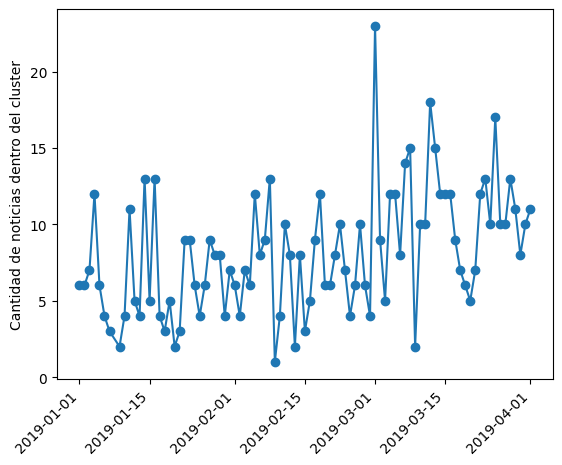

In [10]:
cluster_1 = filt_tres_meses[filt_tres_meses['id_cluster'] == '3']
cluster_1 = cluster_1.drop_duplicates(subset='Link')
conteo_fechas = cluster_1['Fecha'].value_counts().reset_index()
cont_ordenado = conteo_fechas.sort_values('Fecha')
plt.figure()
plt.plot(cont_ordenado['Fecha'], cont_ordenado['count'], 'o-')
plt.ylabel('Cantidad de noticias dentro del cluster')
plt.xticks(rotation=45, ha='right')


In [40]:
from collections import Counter
frecuencia = Counter(cluste_map.values())
frecuencia


Counter({'3': 679,
         '41': 129,
         '47': 88,
         '62': 88,
         '66': 71,
         '73': 71,
         '77': 58,
         '1': 53,
         '85': 51,
         '88': 50,
         '90': 49,
         '89': 47,
         '100': 45,
         '105': 44,
         '97': 37,
         '102': 36,
         '116': 35,
         '124': 35,
         '107': 34,
         '115': 33,
         '83': 32,
         '123': 31,
         '109': 30,
         '111': 30,
         '120': 30,
         '140': 30,
         '114': 28,
         '139': 28,
         '158': 28,
         '145': 27,
         '154': 27,
         '134': 26,
         '136': 26,
         '93': 25,
         '130': 25,
         '162': 25,
         '125': 24,
         '131': 24,
         '133': 24,
         '149': 24,
         '159': 24,
         '171': 24,
         '5': 23,
         '132': 23,
         '128': 22,
         '173': 21,
         '106': 20,
         '135': 20,
         '150': 20,
         '144': 19,
         '151': 1

In [45]:
cluste_map
[k for k, v in cluste_map.items() if v == '62']


['Dentro del Partido Justicialista estamos hablando todos los sectores desde el kirchnerismo, el massismo, con el peronismo que no se identifica con estas estructuras, para tratar de llegar a una gran PASO nacional, donde los afiliados podamos elegir quién representa este proyecto',
 'a sumar y colaborar con la unidad opositora al Gobierno nacional que ella expresa porque para salvarse, la Argentina necesita antes que nada salvarse de esta Alianza que hoy se denomina Cambiemos',
 'Ganar o perder la elección de octubre depende del poder de organización que logremos dentro del peronismo. Macri ya nos sirvió el escenario para terminar con Cambiemos. Si podemos articular a todos los sectores, volvemos al poder',
 'la sociedad, incluso aquella que vota a Cambiemos, pide un cambio. Tendrán que ganarnos o no, yo creo que el radicalismo puede ganar en las PASO. Sería más fácil ganar en las generales con un programa radical',
 'tiene que aglutinar a todas las fuerzas progresistas y demo

(17532.0, 19358.0)

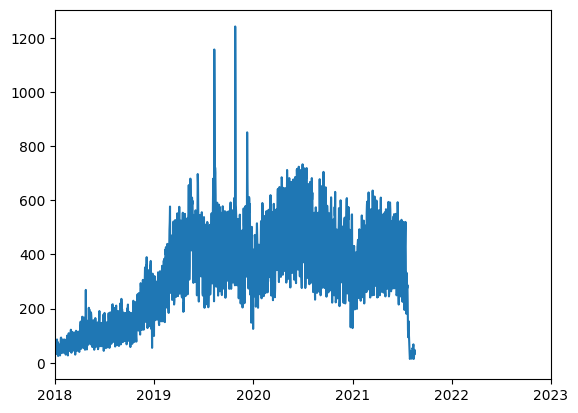

In [19]:
from datetime import datetime, timedelta

cantidad_por_fecha = base.groupby(base['fecha'].dt.date).size()
fechas = cantidad_por_fecha.index
cantidad = cantidad_por_fecha.values
plt.plot(fechas, cantidad)
fecha_fin = datetime(2023, 1, 1)  # Fecha de inicio deseada
fecha_inicio = datetime(2018, 1,1)  # Fecha de fin deseada
plt.xlim([fecha_inicio, fecha_fin])


(array([17532., 17713., 17897., 18078., 18262., 18444., 18628., 18809.,
        18993., 19174.]),
 [Text(17532.0, 0, '2018-01'),
  Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01'),
  Text(18078.0, 0, '2019-07'),
  Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07')])

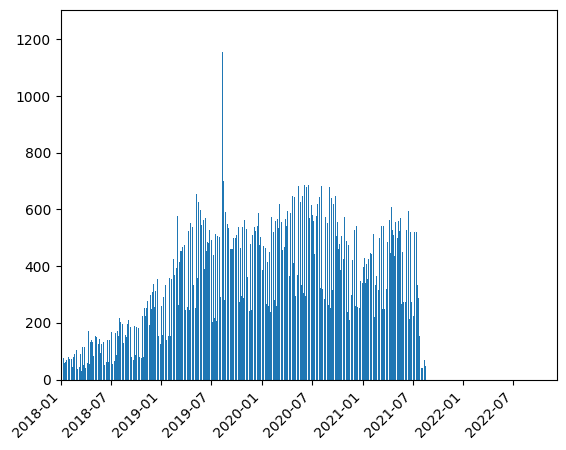

In [26]:
from datetime import datetime, timedelta
cantidad_por_fecha = base.groupby(base['fecha'].dt.date).size()
fechas = cantidad_por_fecha.index
cantidad = cantidad_por_fecha.values

plt.bar(fechas, cantidad)

fecha_fin = datetime(2023, 1, 1)  # Fecha de inicio deseada
fecha_inicio = datetime(2018, 1,1)  # Fecha de fin deseada
ventana = timedelta(days=5*30)  # Intervalo de tiempo de 3 meses
intervalos = pd.date_range(start=fecha_inicio, end=fecha_fin, freq=ventana)
plt.xlim([intervalos[0], intervalos[-1]])
plt.xticks(rotation=45, ha='right')
